# Com outliers e sem colunas

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cenario1_engine.csv")

In [3]:
df.head()

,Brand_Mod,model,model_year,KM,fuel,HP,Litros,Cilindros,transmission_mod,ext_col_mod,int_col_mod,accident_mod,clean_title_mod,price_eur
0,Outra,Wrangler Sport,2014,114263,Gasoline,285.0,3.6,6.0,Automatic,Outra,Black,None reported,Yes,20020
1,Outra,Highlander XLE,2015,110361,Gasoline,270.0,3.5,6.0,Automatic,Outra,Outra,At least 1 accident or damage reported,Yes,23660
2,Outra,Camry Hybrid XLE,2018,112076,Hybrid,208.0,2.5,4.0,CVT,white,Black,At least 1 accident or damage reported,Yes,21835
3,Outra,Outback Touring XT,2021,53913,Gasoline,260.0,2.4,4.0,CVT,Outra,Outra,None reported,Yes,30940
4,Outra,GX 460 Base,2018,120701,Gasoline,301.0,4.6,8.0,Automatic,white,beige,At least 1 accident or damage reported,Yes,34666


In [4]:
df = df.drop(columns=["Brand_Mod", "model", "fuel", "transmission_mod", "ext_col_mod", "int_col_mod", "accident_mod", "clean_title_mod"])

In [5]:
df.to_csv("cenario4_engine.csv", index=False)

In [2]:
df_final = pd.read_csv("cenario3_engine.csv")

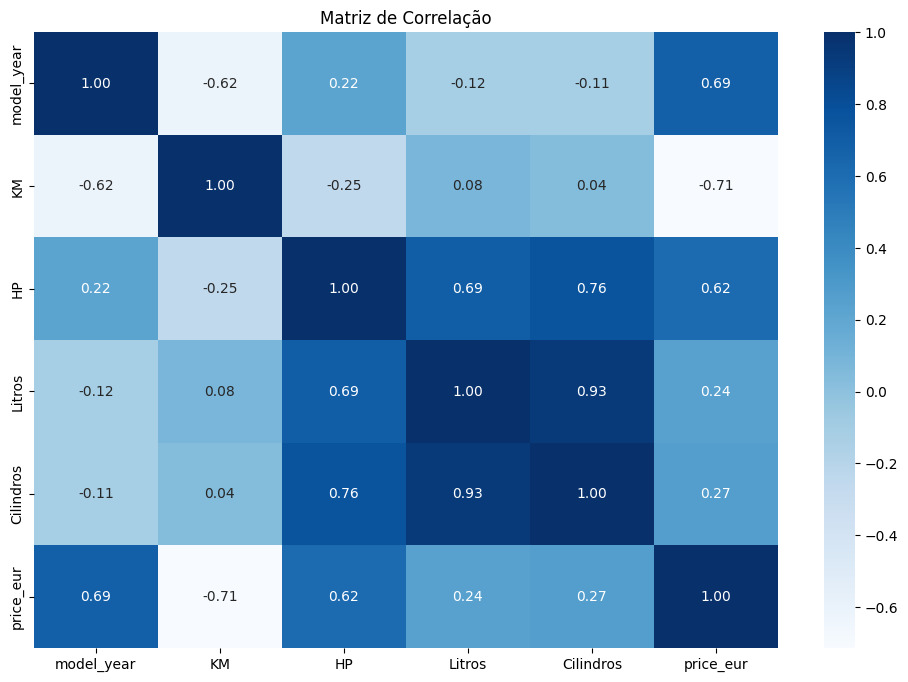

In [3]:
# Seleciona apenas as colunas não numéricas
categorical_columns = df_final.select_dtypes(include='object').columns

# Mapeia as categorias para números
for column in categorical_columns:
    df_final[column] = df_final[column].astype('category').cat.codes

# Calcule a matriz de correlação de Spearman
correlation_matrix = df_final.corr(method='spearman')

# Visualize a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()